In [1]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the data
rootPath = '/Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/MEG'
groupName = 'GroupB'
recRoot = os.path.join(rootPath, groupName, 'Recording')

# Filter files based on their extensions
lstFiles = os.listdir(recRoot)
sqdFiles = [f for f in lstFiles if f.endswith('_NR.sqd')]
mrkFiles = [f for f in lstFiles if f.endswith('.mrk')]
elpFiles = [f for f in lstFiles if f.endswith('Points.txt')]
hsFiles = [f for f in lstFiles if f.endswith('HS.txt')]

In [3]:
# In this case, second file is the one we want to load
ff = sqdFiles[1]
mrk = []
for mrkIdx in range(len(mrkFiles)):
    mrk.append(os.path.join(recRoot, mrkFiles[mrkIdx]))
elp = os.path.join(recRoot, elpFiles[0])
hsp = os.path.join(recRoot, hsFiles[0])
kitpath = os.path.join(recRoot, ff)
raw = mne.io.read_raw_kit(kitpath, mrk=mrk, elp=elp, hsp=hsp,
                            verbose=True)

# Set stim channels
stim_channels = ['MISC 001', 'MISC 002', 'MISC 003', 'MISC 004', 'MISC 005', 'MISC 007', 'MISC 008']
raw.set_channel_types({ch: 'stim' for ch in stim_channels})

# Save the raw data as a fif file
# raw.save(os.path.join(recRoot, ff.replace('.sqd', '.fif')), overwrite=False)

# Get a count of events for each channel
# for stCh in stim_channels:
#     thEvents = mne.find_events(raw, stim_channel=stCh, min_duration=0.002)
#     print(f"Events for {stCh}: {len(thEvents)}")

Extracting SQD Parameters from /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/MEG/GroupB/Recording/R2470_EventModel_9.26.24_NR.sqd...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.


<RawKIT | R2470_EventModel_9.26.24_NR.sqd, 193 x 4740000 (4740.0 s), ~1.7 MB, data not loaded>

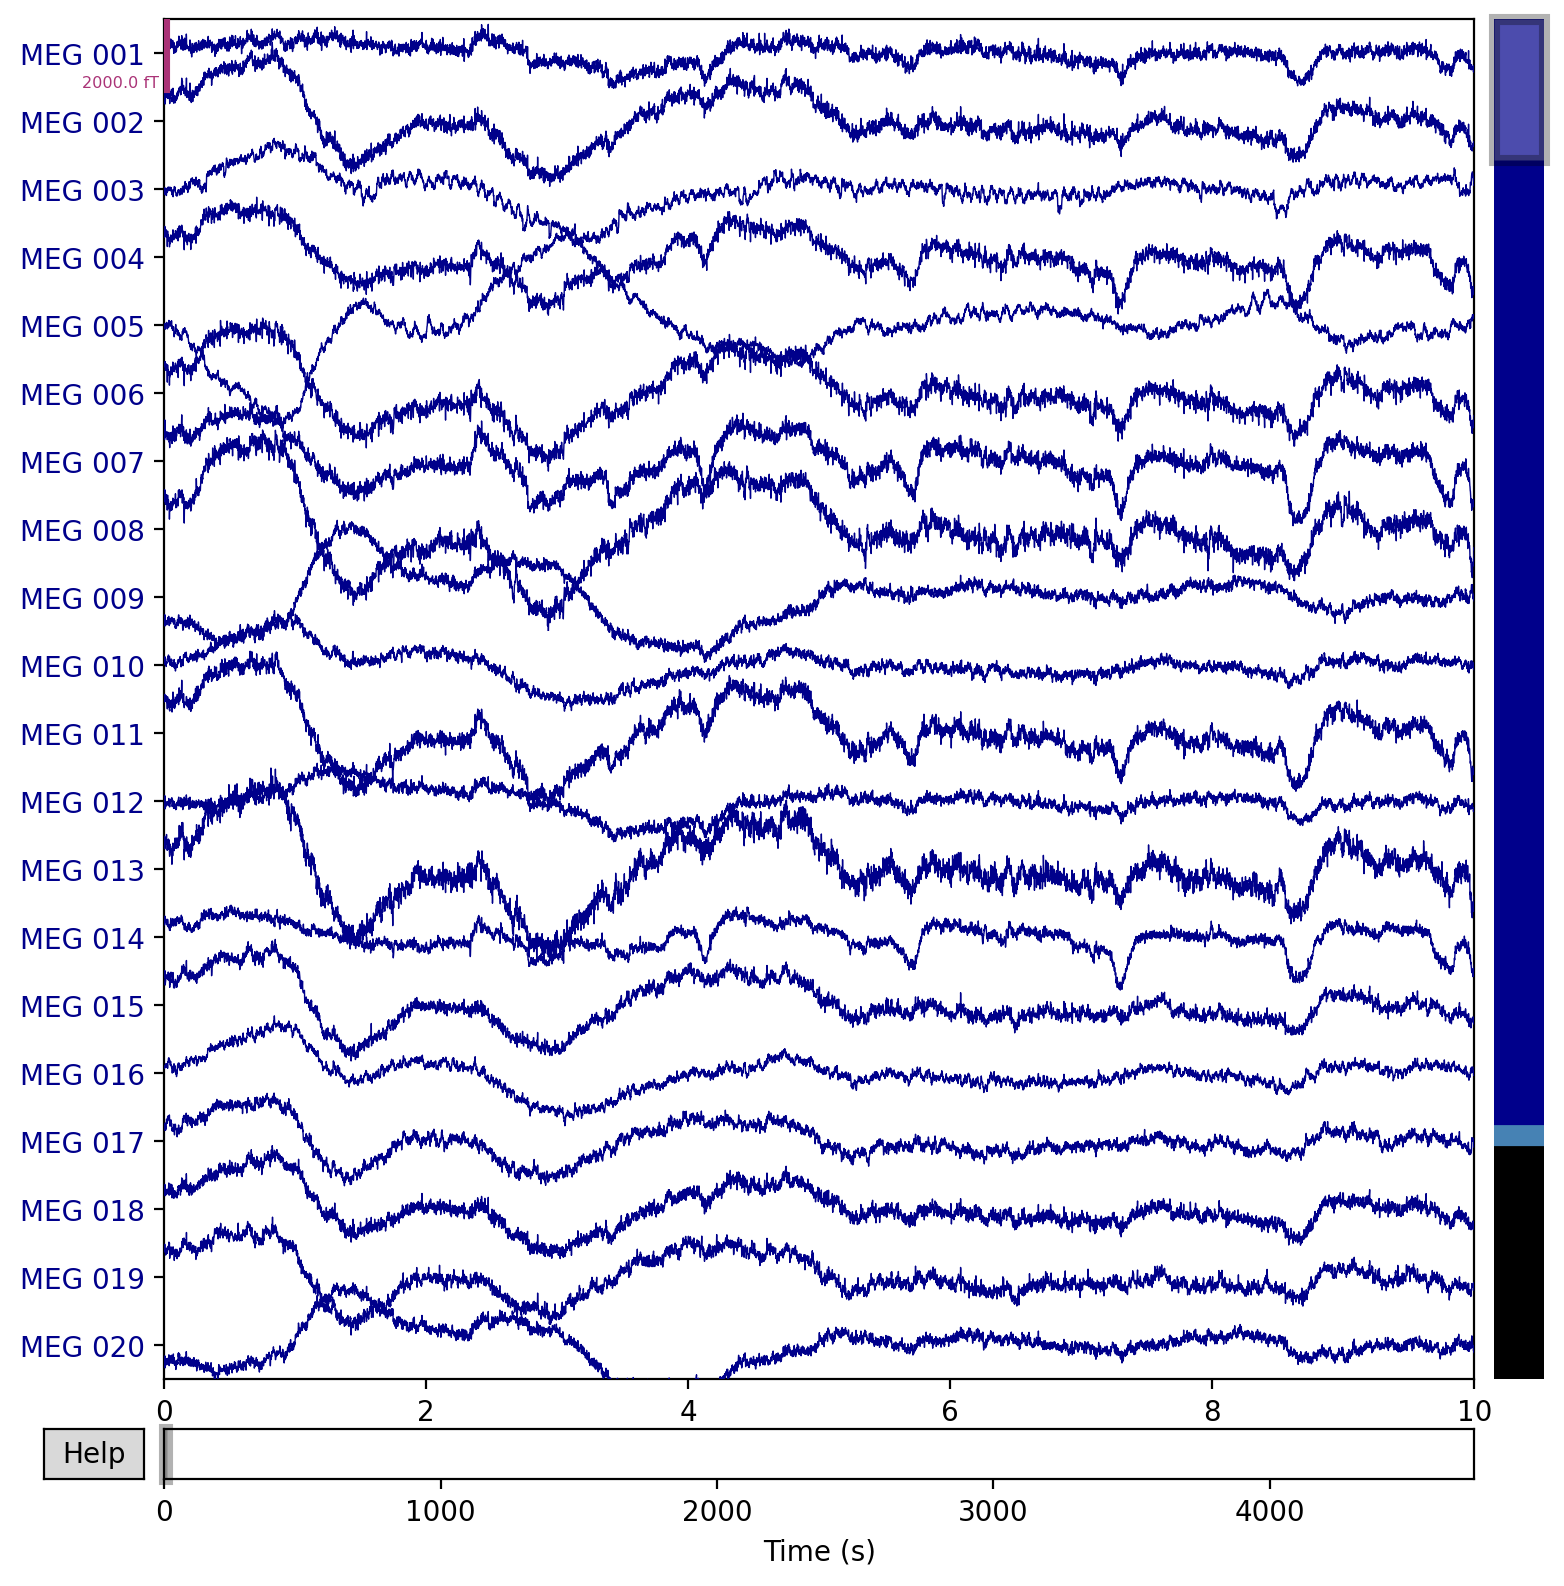

Channels marked as bad:
none


In [12]:
# Visualize the data in databrowser
raw.plot(scalings={'mag':1e-12})

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


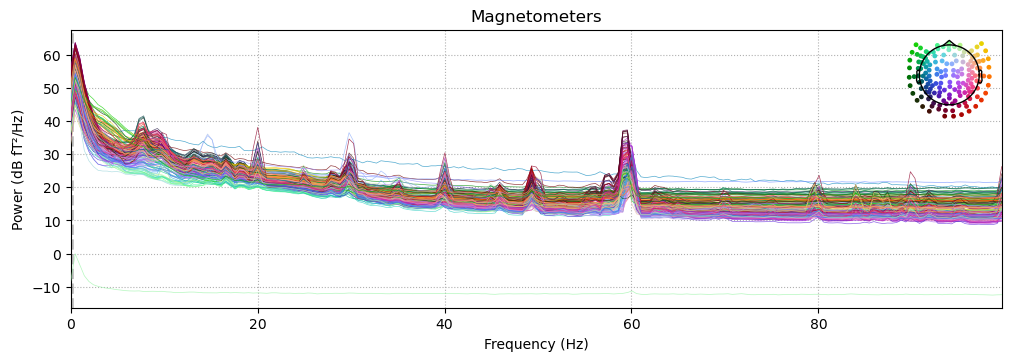

In [7]:
# Compute spectrogram per channel with FFT
raw.compute_psd(fmin=0, fmax=100, n_fft=2048, n_overlap=1024).plot()

Trigger channel MISC 001 has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
16 events found on stim channel MISC 001
Event IDs: [4]
Not setting metadata
16 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 16 events and 601 original time points ...
0 bad epochs dropped


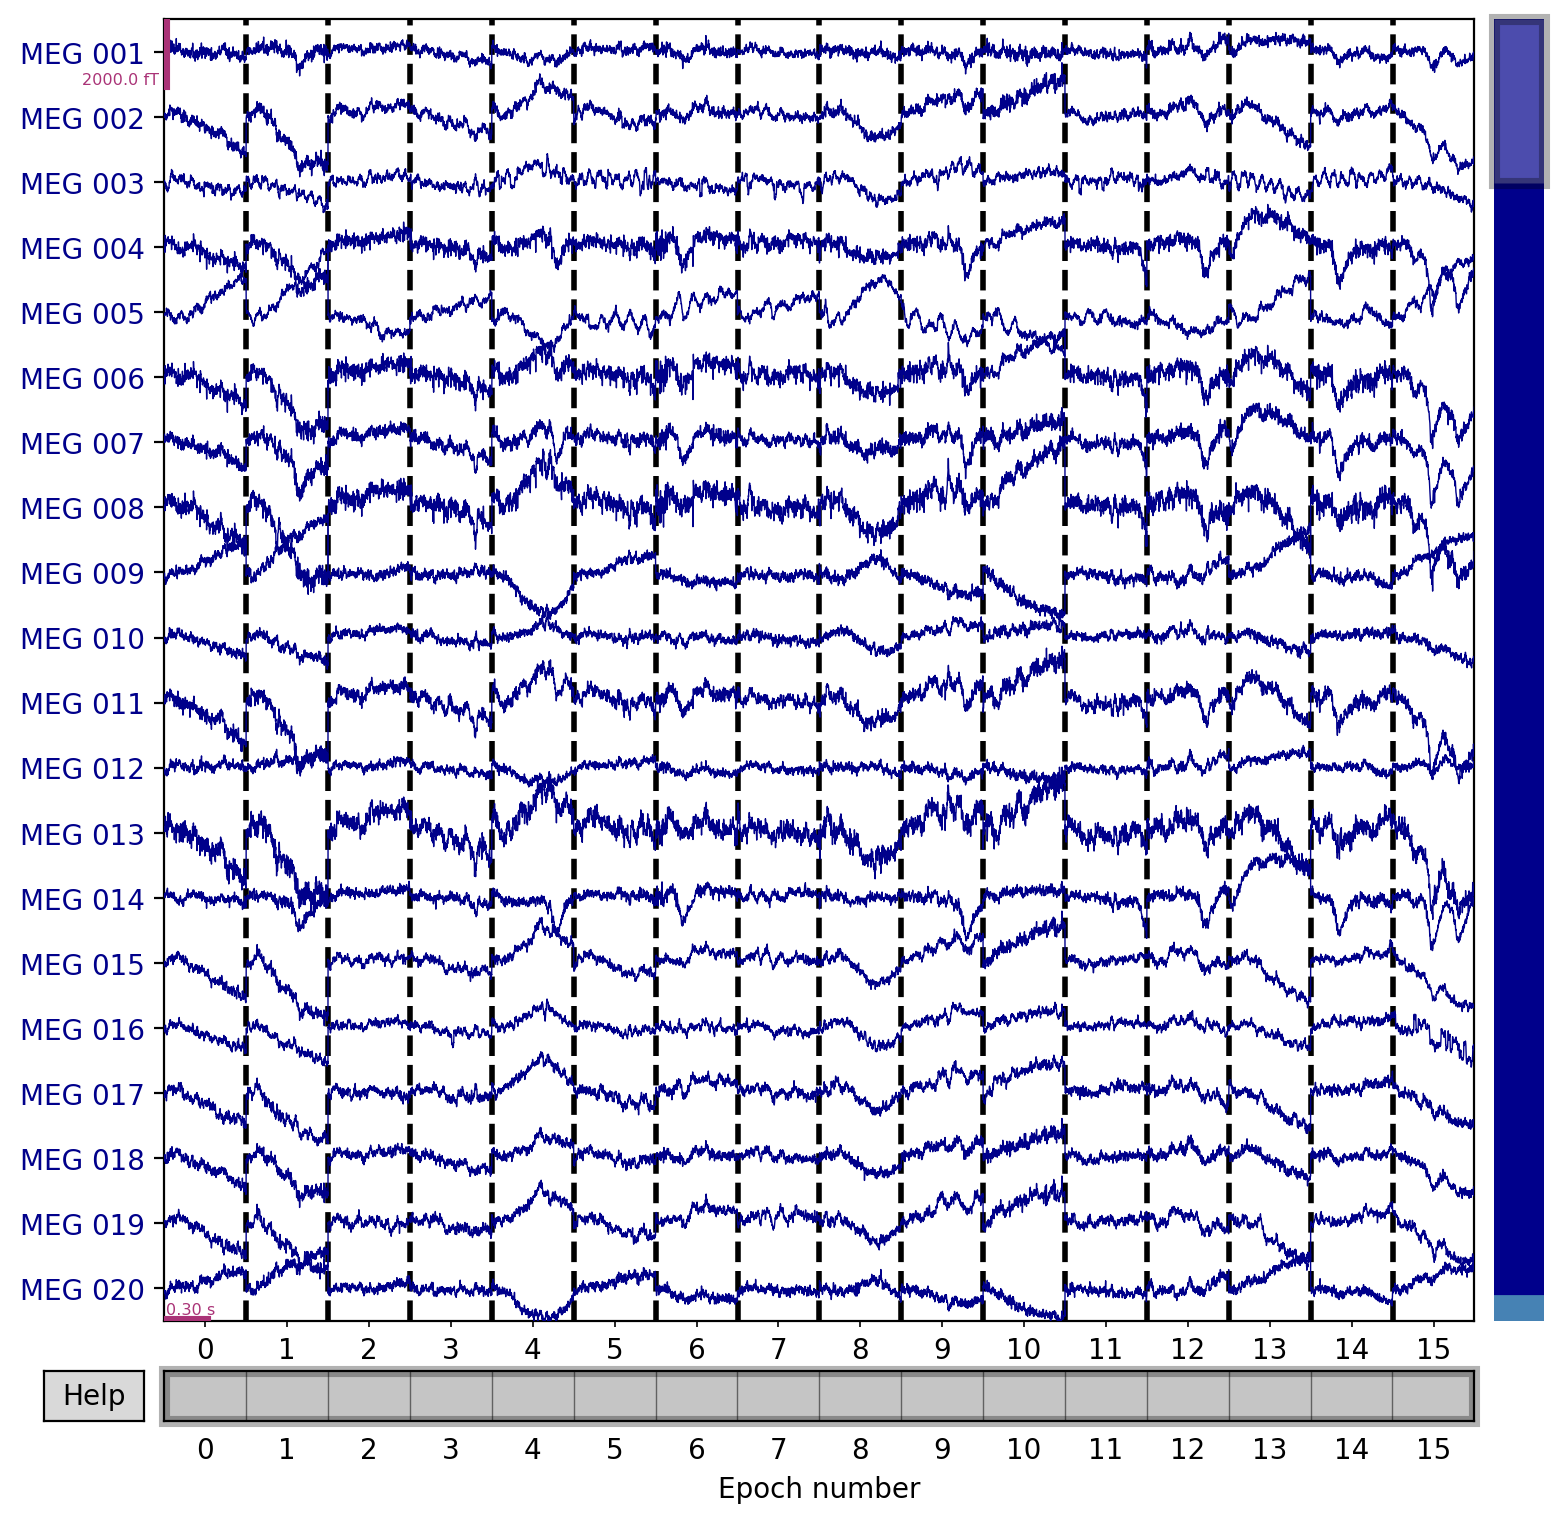

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
['MEG 126']


In [11]:
wordDataset = mne.Epochs(raw.copy(), mne.find_events(raw, stim_channel='MISC 001'), tmin=-0.1, tmax=0.5, baseline=(None, 0), preload=True)
wordDataset.plot(scalings={'mag': 1e-12})